In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_unn.npy')

In [3]:
X_test = images[2893:3616]
y_test = masks[2893:3616]

In [4]:
images = images[0:2893]
masks = masks[0:2893]

In [5]:
images.shape

(2893, 512, 512, 1)

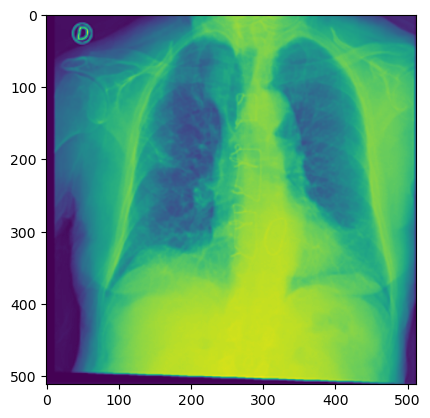

In [6]:
imshow(images[100])

In [7]:
masks.shape

(2893, 512, 512, 1)

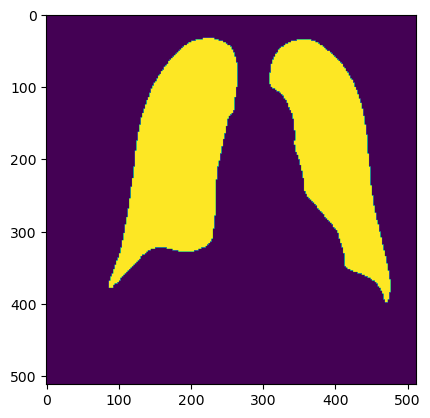

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

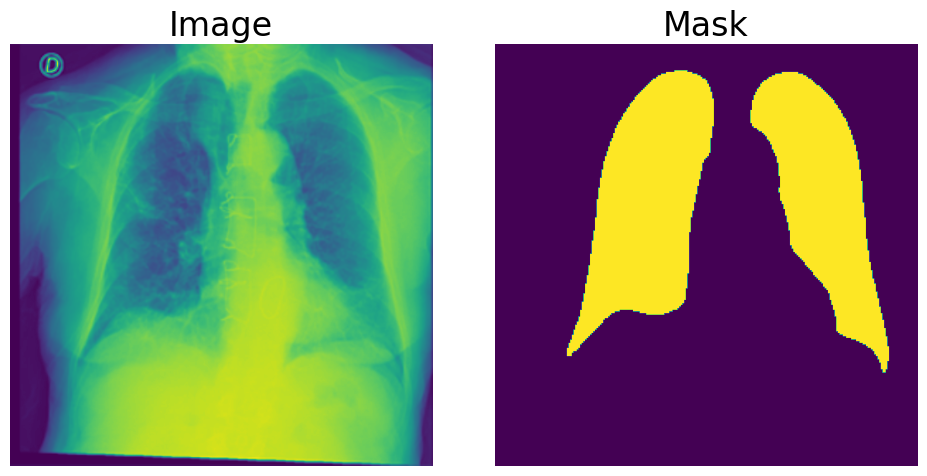

In [10]:
plt.rcParams['font.size'] = 20
gp2.Util.display_image_and_mask(images[100], masks[100])

In [6]:
from keras import losses

In [7]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpofrf4l4wkuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpngpo0u2wkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpngpo0u2wkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=10, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_1_10_covid.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
9/9 [==============================] - 16s 715ms/step - loss: 0.3903 - dice_coeff: 0.5169 - val_loss: 0.3463 - val_dice_coeff: 0.5577
Epoch 2/100
9/9 [==============================] - 4s 517ms/step - loss: 0.3500 - dice_coeff: 0.5540 - val_loss: 0.3366 - val_dice_coeff: 0.5592
Epoch 3/100
9/9 [==============================] - 4s 514ms/step - loss: 0.3435 - dice_coeff: 0.5574 - val_loss: 0.3376 - val_dice_coeff: 0.5696
Epoch 4/100
9/9 [==============================] - 4s 517ms/step - loss: 0.3427 - dice_coeff: 0.5569 - val_loss: 0.3407 - val_dice_coeff: 0.5697
Epoch 5/100
9/9 [==============================] - 4s 529ms/step - loss: 0.3351 - dice_coeff: 0.5706 - val_loss: 0.3265 - val_dice_coeff: 0.5723
Epoch 6/100
9/9 [==============================] - 4s 517ms/step - loss: 0.3340 - dice_coeff: 0.5672 - val_loss: 0.3538 - val_dice_coeff: 0.5812
Epoch 7/100
9/9 [==============================] - 4s 516ms/step - loss: 0.3440 - dic

Testing the classifier...
Testing the discriminator...
6/6 [==============================] - 0s 42ms/step - loss: 16.2685 - accuracy: 0.5087
Found 7 machine labels.
Replacing 2 from 7 !
D_relabeled_ 2
point ids 2
Removed: 2 Filled: 2
TOOK 223.75486087799072 seconds
==== DONE LOOP 4 ====
******
Loop 5
Epoch 1/100
14/14 [==============================] - 6s 425ms/step - loss: 0.1074 - dice_coeff: 0.8746 - val_loss: 0.1415 - val_dice_coeff: 0.8552
Epoch 2/100
14/14 [==============================] - 6s 403ms/step - loss: 0.1011 - dice_coeff: 0.8810 - val_loss: 0.0955 - val_dice_coeff: 0.8914
Epoch 3/100
14/14 [==============================] - 6s 406ms/step - loss: 0.0929 - dice_coeff: 0.8897 - val_loss: 0.0910 - val_dice_coeff: 0.8965
Epoch 4/100
14/14 [==============================] - 6s 402ms/step - loss: 0.0808 - dice_coeff: 0.9063 - val_loss: 0.0845 - val_dice_coeff: 0.9140
Epoch 5/100
14/14 [==============================] - 5s 399ms/step - loss: 0.0728 - dice_coeff: 0.9165 - val_

In [16]:
R.classifier_scores

[[0.3576214611530304, 0.5484493970870972],
 [0.24623575806617737, 0.708958625793457],
 [0.2618638575077057, 0.707882285118103],
 [0.12373853474855423, 0.8609269261360168],
 [0.09158250689506531, 0.9044634699821472],
 [0.07465675473213196, 0.9558423757553101]]

In [17]:
R.discriminator_scores

[[0.005856939125806093, 0.9942196607589722],
 [4.9829230308532715, 0.7919074892997742],
 [4.498456001281738, 0.8092485666275024],
 [16.268545150756836, 0.5086705088615417],
 [14.959748268127441, 0.5780346989631653],
 [22.067934036254883, 0.4797687828540802]]

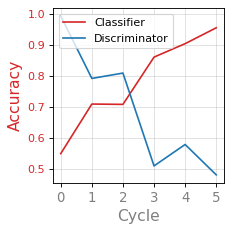

In [18]:
R.plot()

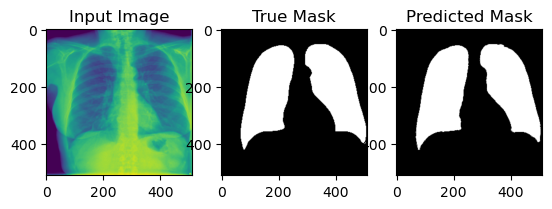

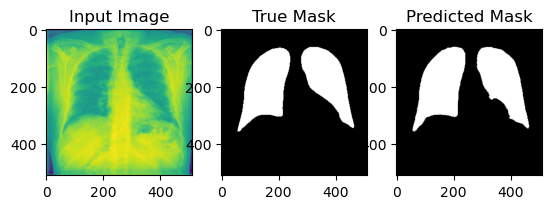

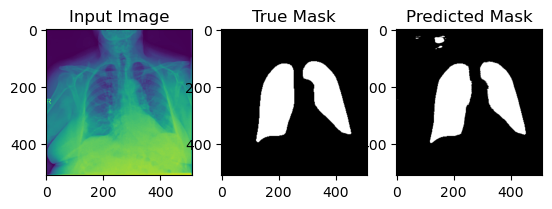

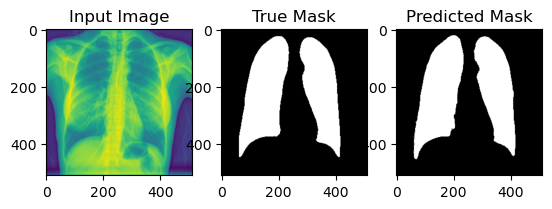

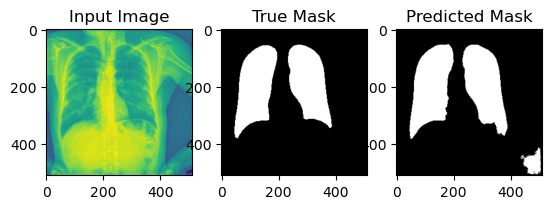

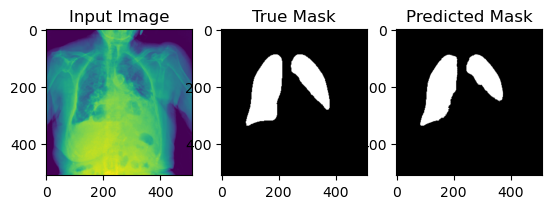

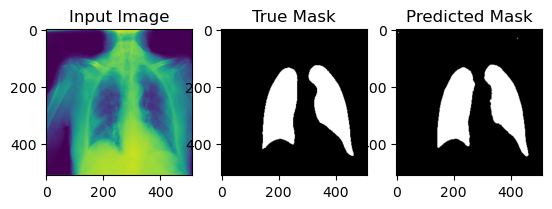

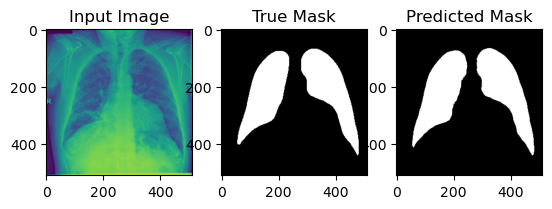

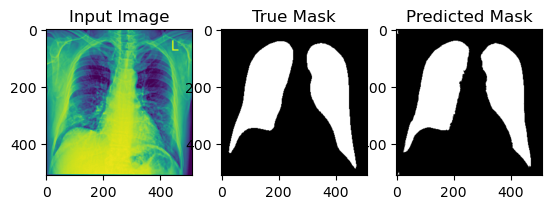

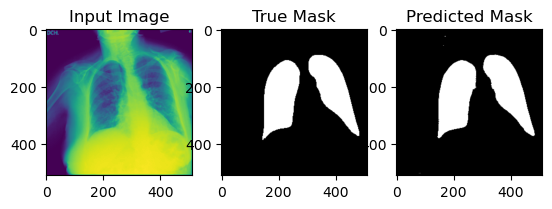

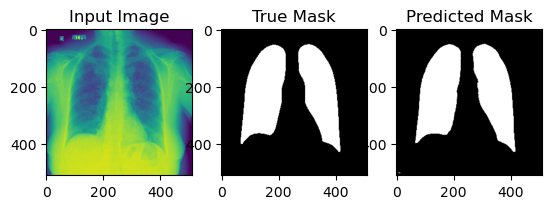

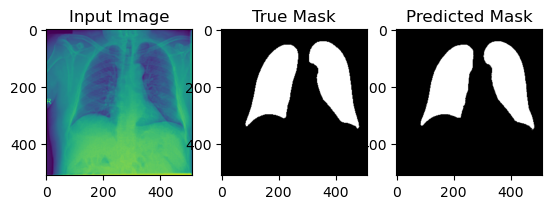

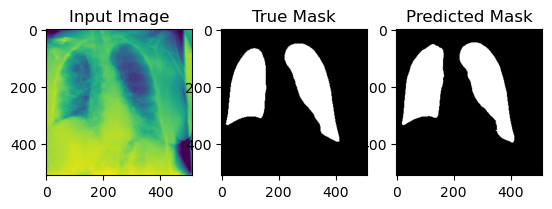

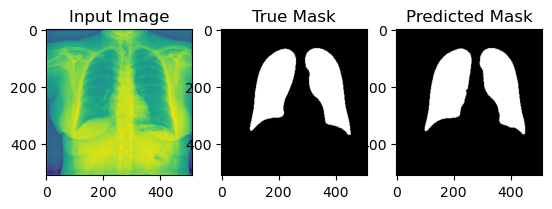

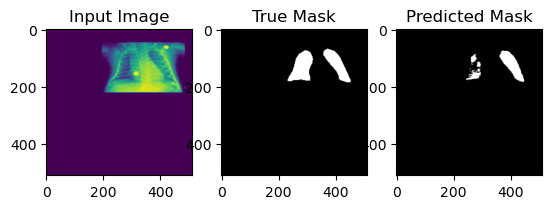

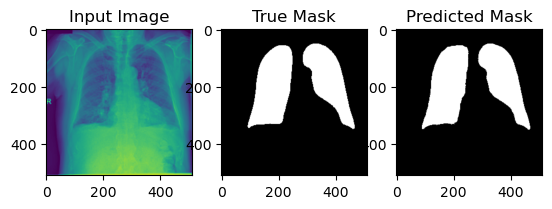

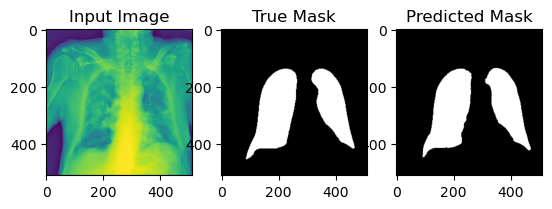

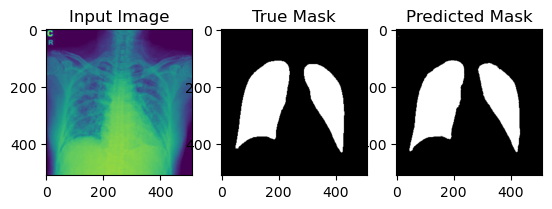

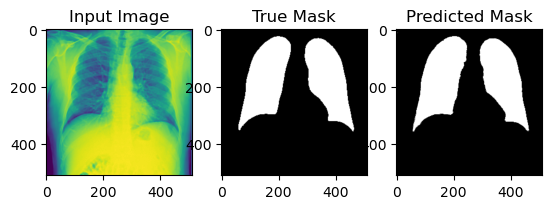

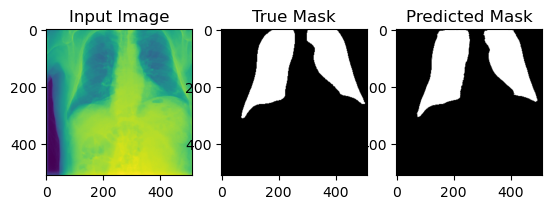

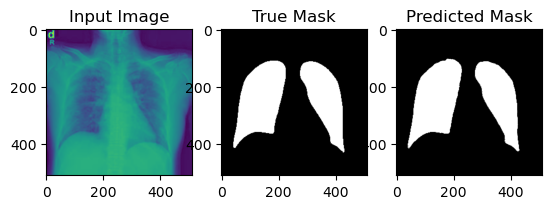

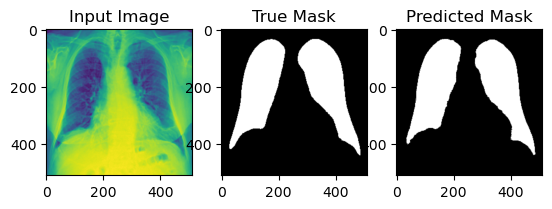

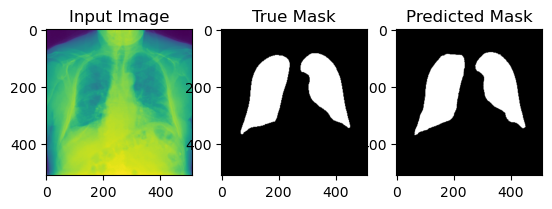

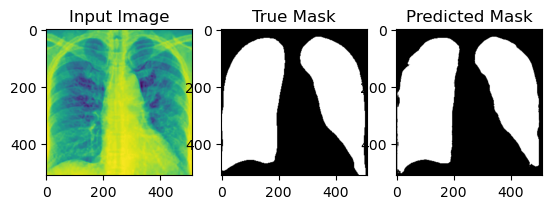

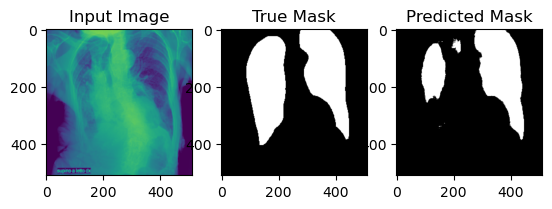

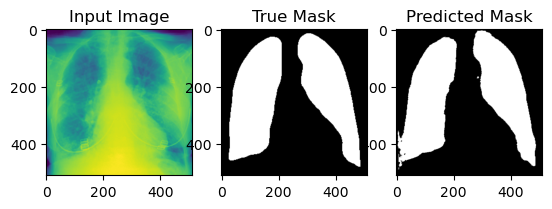

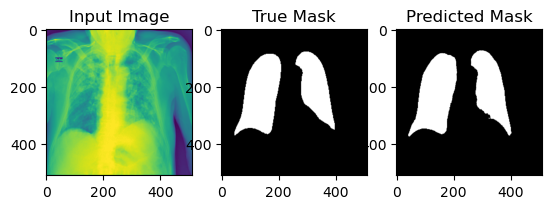

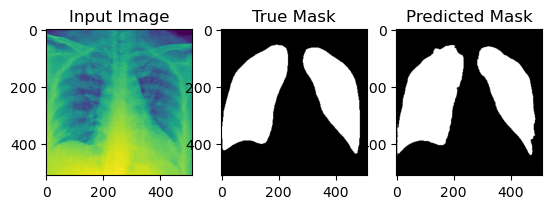

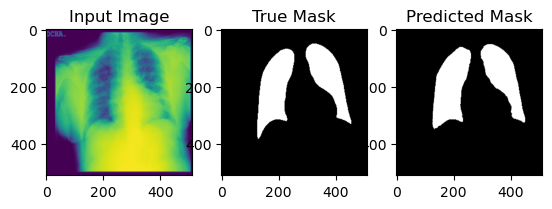

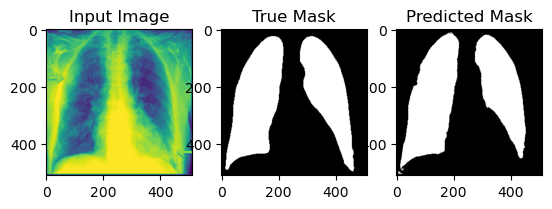

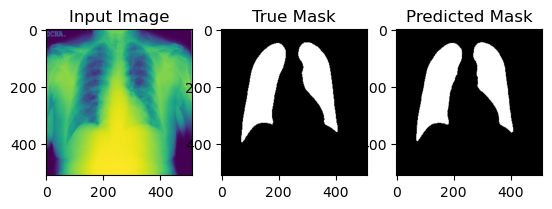

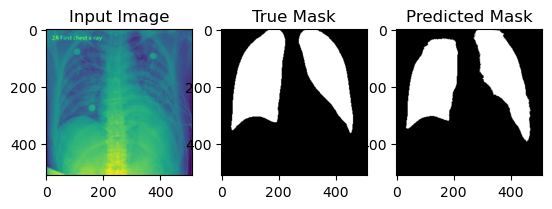

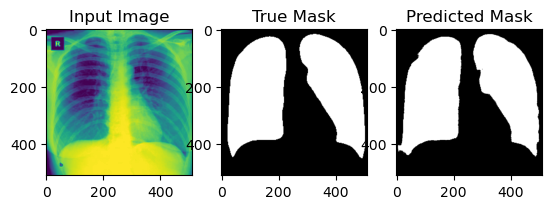

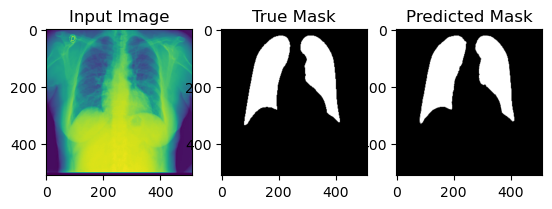

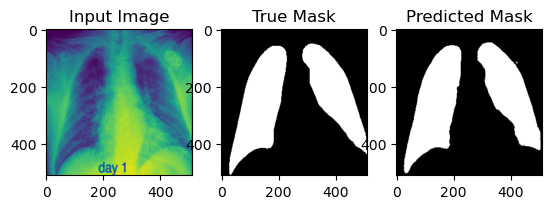

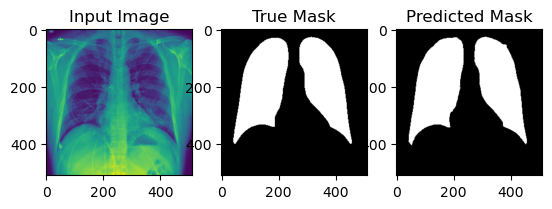

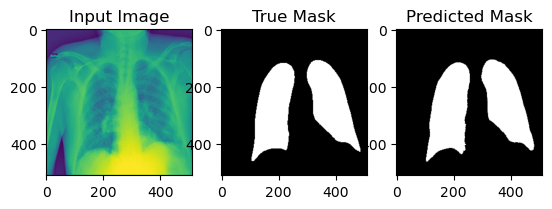

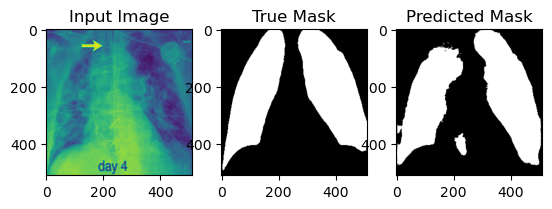

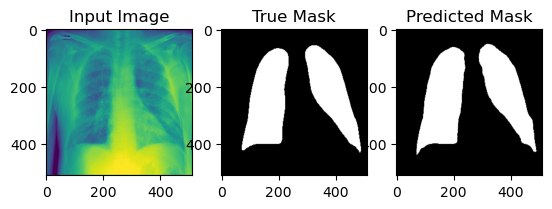

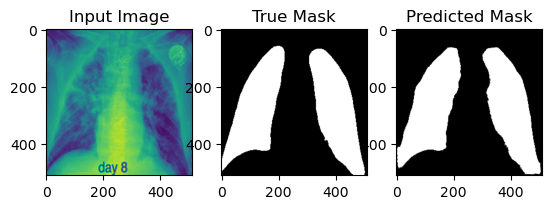

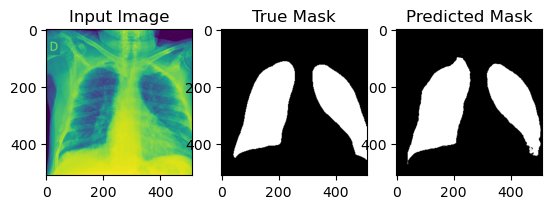

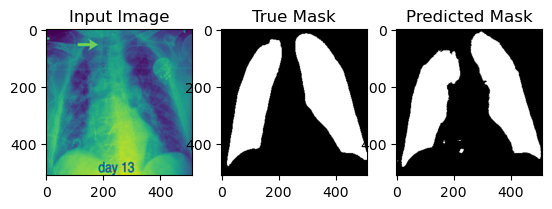

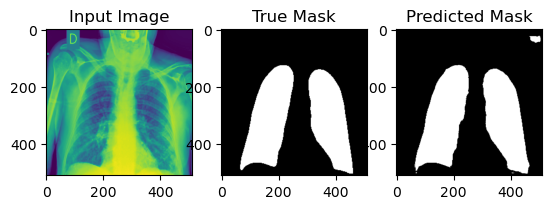

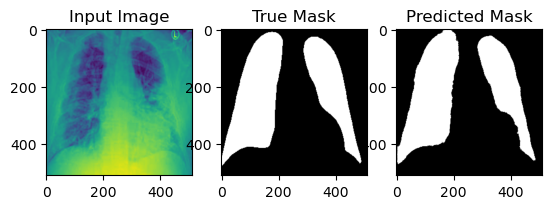

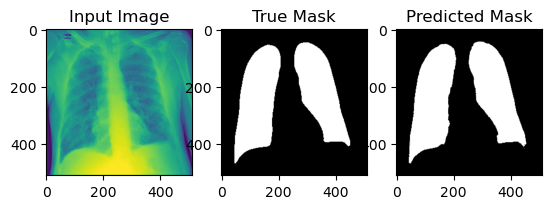

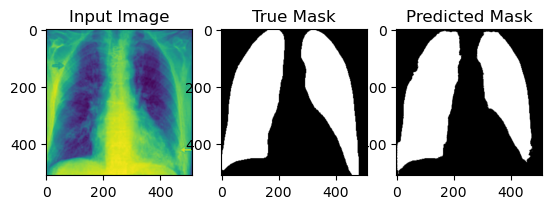

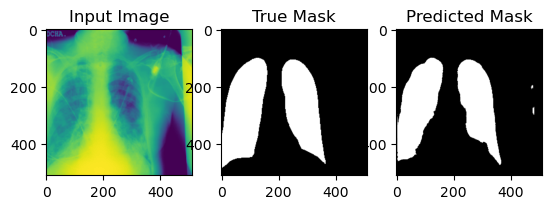

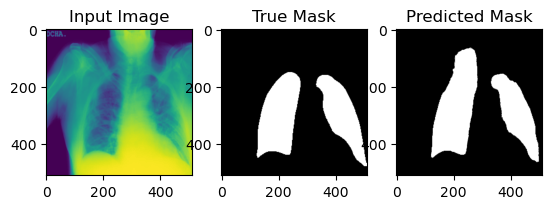

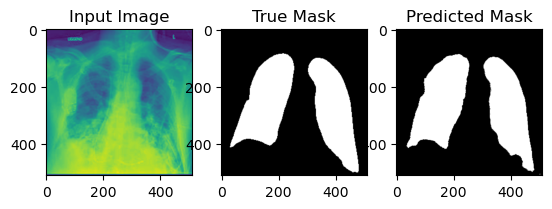

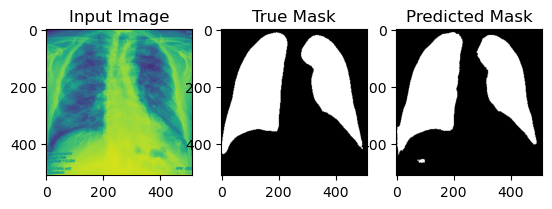

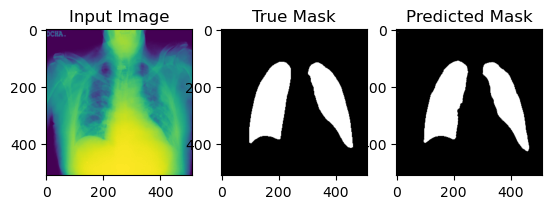

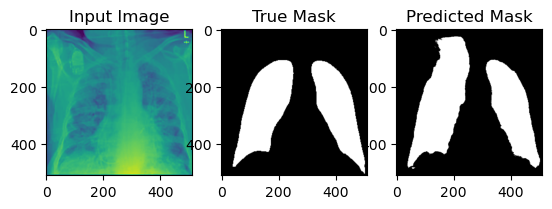

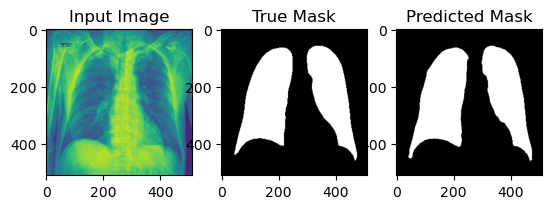

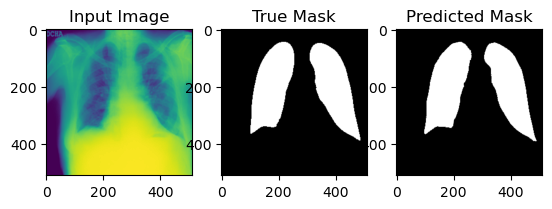

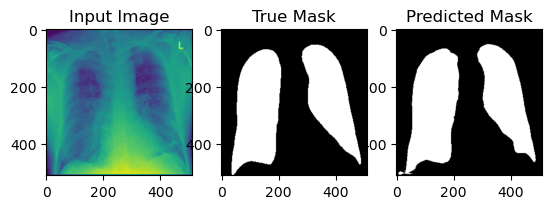

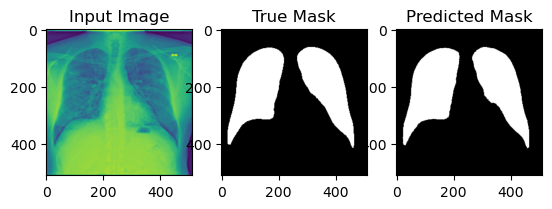

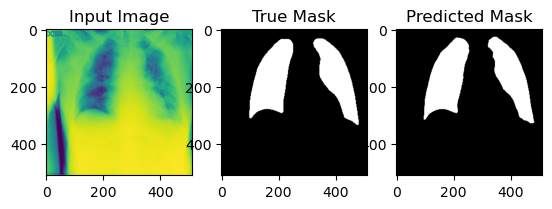

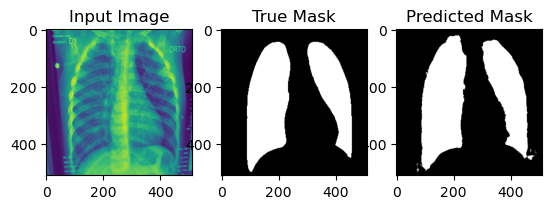

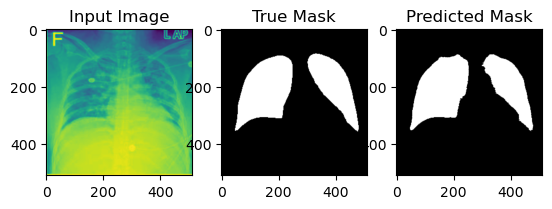

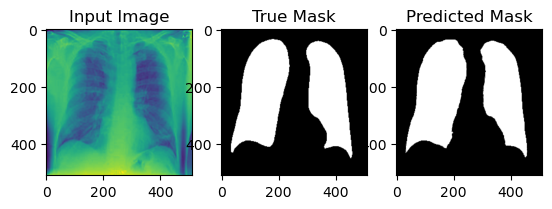

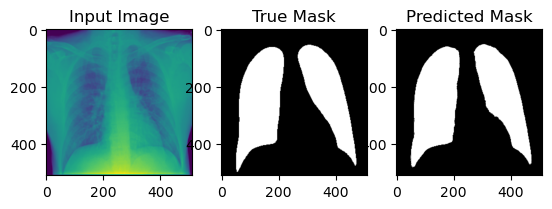

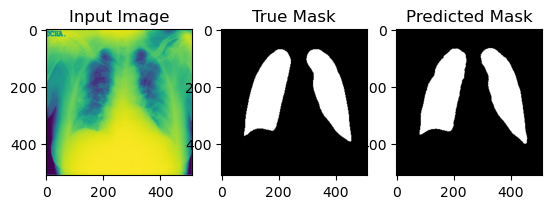

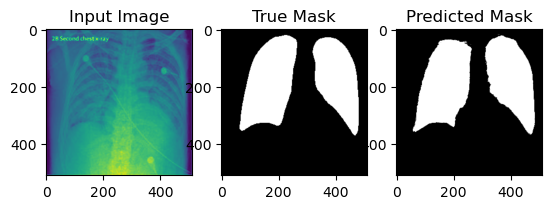

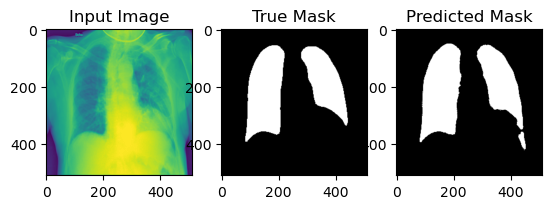

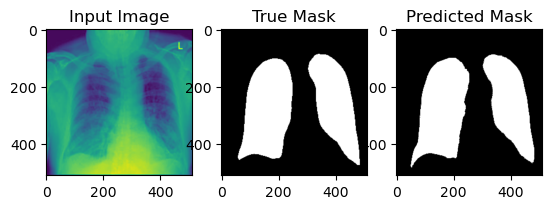

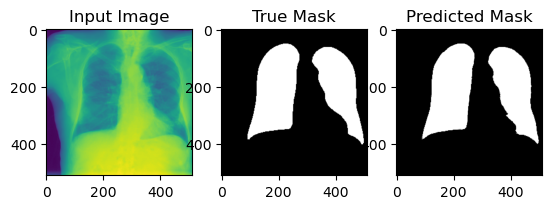

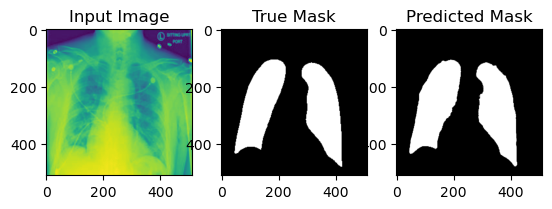

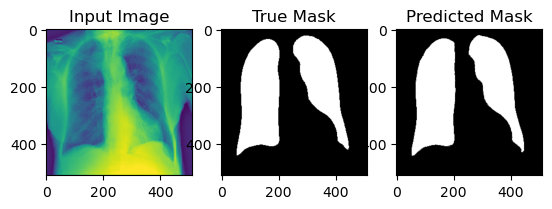

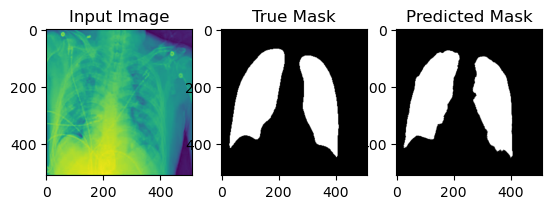

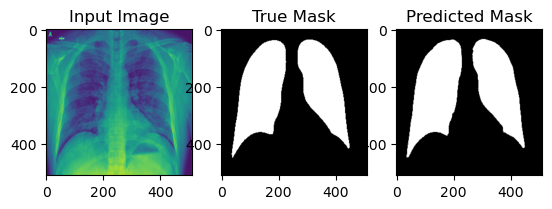

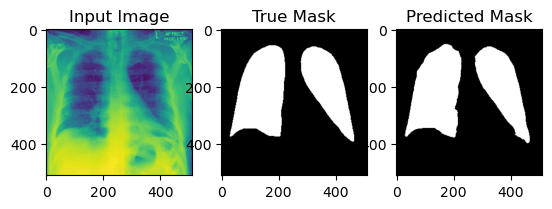

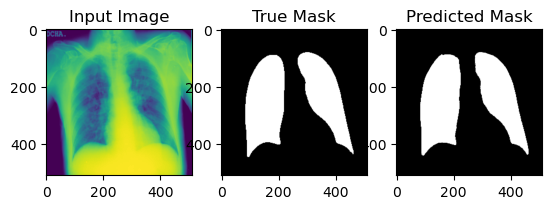

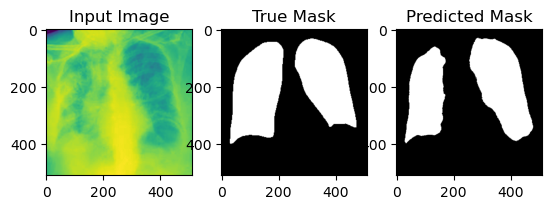

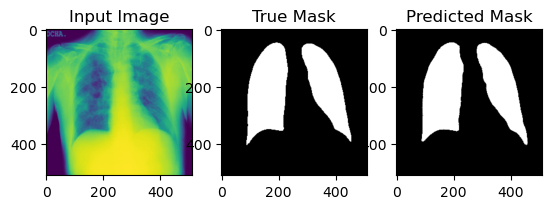

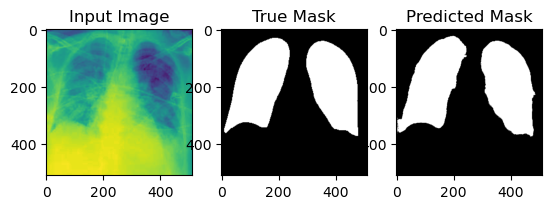

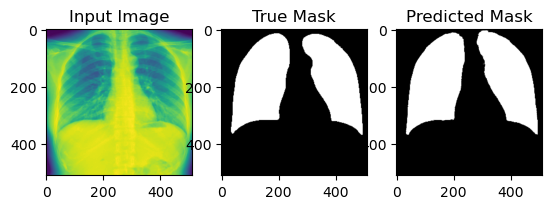

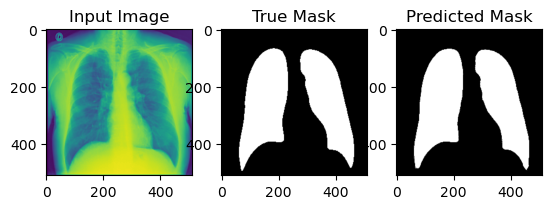

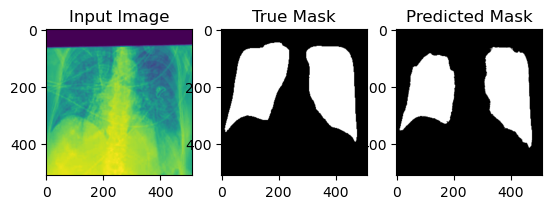

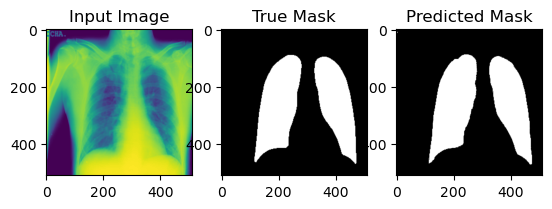

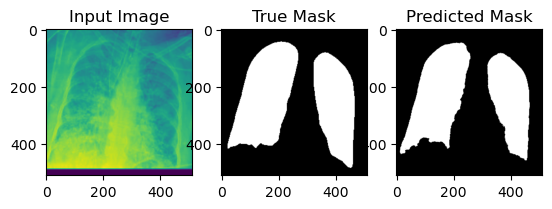

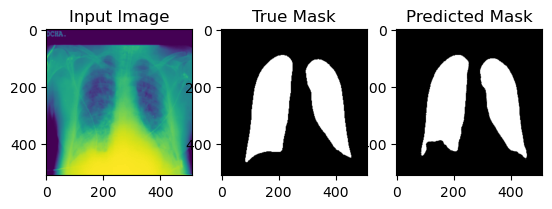

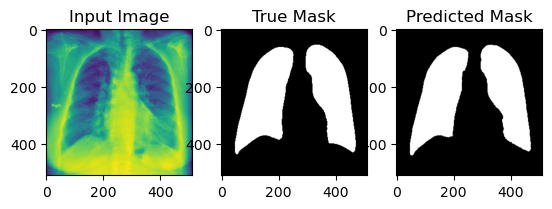

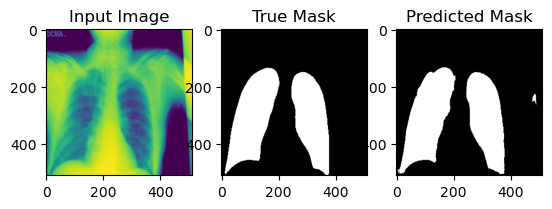

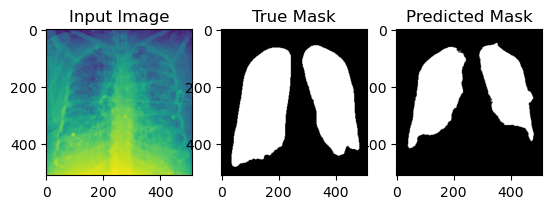

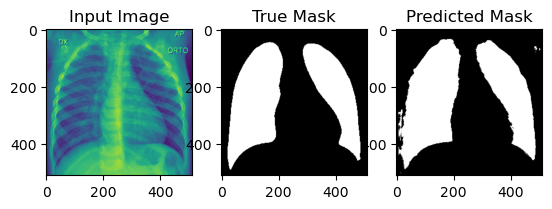

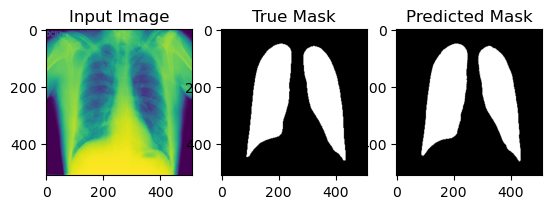

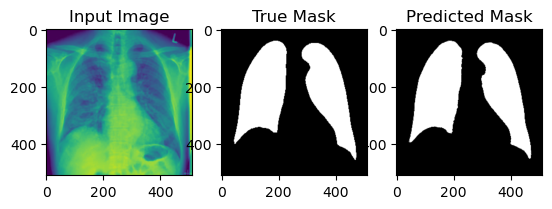

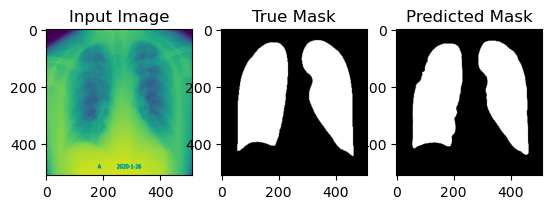

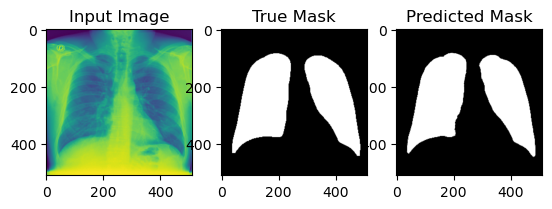

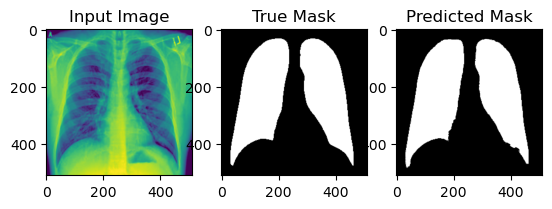

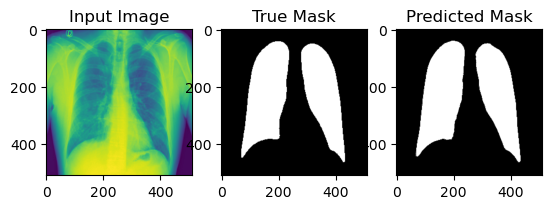

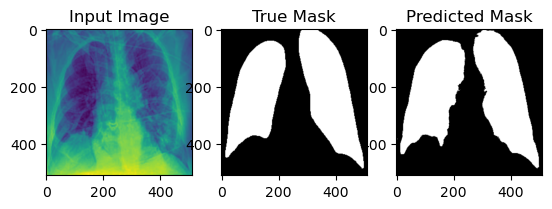

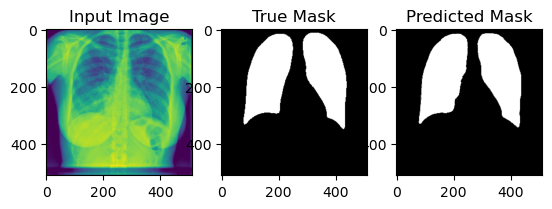

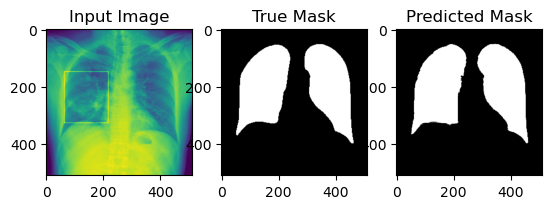

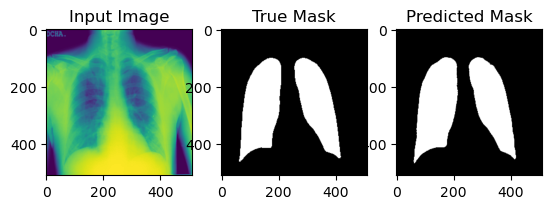

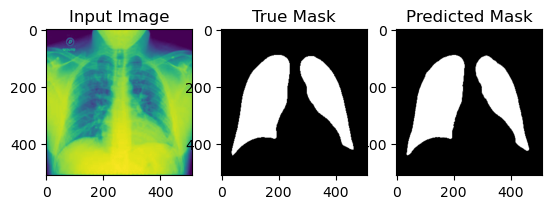

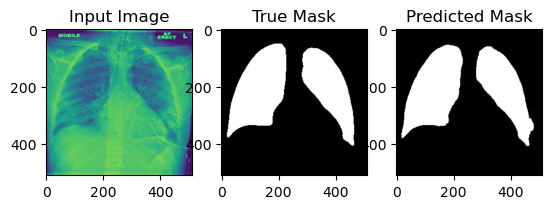

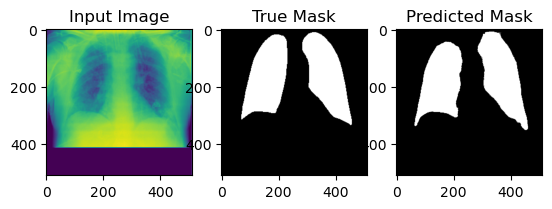

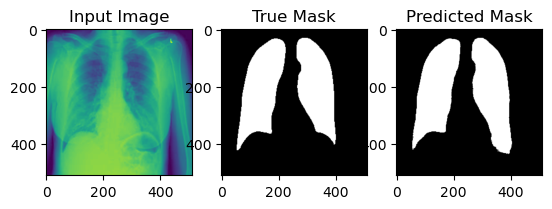

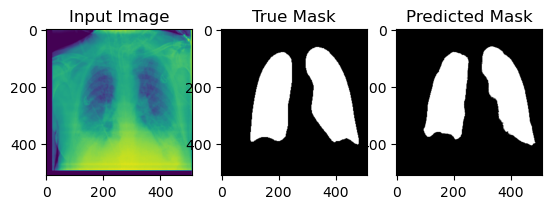

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [8]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpofrf4l4wkuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpdwo5ys74kuc_unet2d


In [9]:
barebone_pred = BareBone.predict(X_test, y_test)

In [10]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [12]:
BareBone.model.metrics_names

['loss', 'dice_coeff']